MOHD ARHAM SHAIKH
200968051
WEEK5 

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

**IMPORTING DATASET**

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [3]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


**IMPORTING** **TRAIN_TEST_SPLIT FROM SKLEARN**

In [8]:
from sklearn.model_selection import train_test_split
X=california_housing.frame.drop(['MedHouseVal'],axis=1).values  
y=california_housing.frame["MedHouseVal"].values


**SCALING USING MINMAX SCALER**

In [11]:
# import module
from sklearn.preprocessing import MinMaxScaler
# scale features
scaler = MinMaxScaler()
model=scaler.fit(X)
X=model.transform(X)
 
# print scaled features
print(scaled_data)

[[0.53966842 0.78431373 0.0435123  ... 0.5674814  0.21115538 0.90226638]
 [0.53802706 0.39215686 0.03822395 ... 0.565356   0.21215139 0.70824656]
 [0.46602805 1.         0.05275646 ... 0.5642933  0.21015936 0.69505074]
 ...
 [0.08276438 0.31372549 0.03090386 ... 0.73219979 0.31175299 0.15938285]
 [0.09429525 0.33333333 0.03178269 ... 0.73219979 0.30179283 0.14371281]
 [0.13025338 0.29411765 0.03125246 ... 0.72582359 0.30976096 0.15340349]]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

(13828, 8)

## **Using the sequential API build a regression MLP**

In [13]:
model1=tf.keras.Sequential()

model1.add(tf.keras.layers.Dense(30, activation='relu',name="HiddenLayer1", input_dim=8))

model1.add(tf.keras.layers.Dense(1, activation='linear',name="OutputLayer"))

In [14]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 30)                270       
                                                                 
 OutputLayer (Dense)         (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [15]:
model1.compile(loss =tf.keras.losses.MeanSquaredError(), optimizer = "adam", metrics=tf.keras.metrics.RootMeanSquaredError())

history= model1.fit(X_train, y_train, batch_size = 32, epochs = 20,validation_split=0.2)

Epoch 1/20
346/346 [==============================] - 1s 3ms/step - loss: 2.2025 - root_mean_squared_error: 1.4841 - val_loss: 1.0448 - val_root_mean_squared_error: 1.0222
Epoch 2/20
346/346 [==============================] - 1s 2ms/step - loss: 0.8902 - root_mean_squared_error: 0.9435 - val_loss: 0.7929 - val_root_mean_squared_error: 0.8905
Epoch 3/20
346/346 [==============================] - 1s 2ms/step - loss: 0.6701 - root_mean_squared_error: 0.8186 - val_loss: 0.6435 - val_root_mean_squared_error: 0.8022
Epoch 4/20
346/346 [==============================] - 1s 2ms/step - loss: 0.5980 - root_mean_squared_error: 0.7733 - val_loss: 0.6154 - val_root_mean_squared_error: 0.7845
Epoch 5/20
346/346 [==============================] - 1s 2ms/step - loss: 0.5799 - root_mean_squared_error: 0.7615 - val_loss: 0.6018 - val_root_mean_squared_error: 0.7757
Epoch 6/20
346/346 [==============================] - 1s 2ms/step - loss: 0.5686 - root_mean_squared_error: 0.7541 - val_loss: 0.6053 - val_

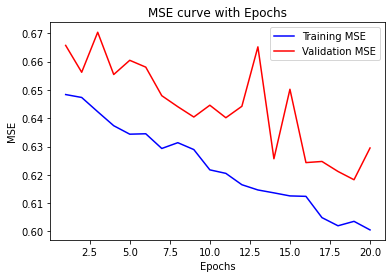

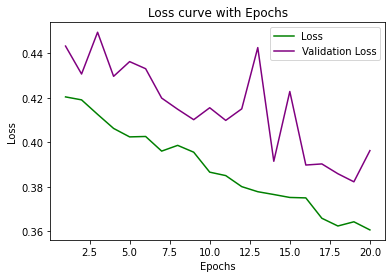

In [30]:
# Plotting and Visualising



modelmse = history.history["root_mean_squared_error"]

modelvmse = history.history["val_root_mean_squared_error"]

modelloss = history.history["loss"]

modelvalloss = history.history["val_loss"]

epochs_list = range(1,21)



plt.plot(epochs_list, modelmse, 'blue', label='Training MSE')

plt.plot(epochs_list, modelvmse, 'red', label='Validation MSE')

plt.xlabel('Epochs')

plt.ylabel('MSE')

plt.title('MSE curve with Epochs')

plt.legend()

plt.show()



#Loss Plot

plt.plot(epochs_list, modelloss, 'green', label="Loss")

plt.plot(epochs_list, modelvalloss, 'purple', label="Validation Loss")

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss curve with Epochs')

plt.legend()

plt.show()

# **Using functional API build the following Wide & Deep Neural Network**

In [24]:
from numpy.core.multiarray import concatenate
inputA=tf.keras.layers.Input(shape=[5])
inputB=tf.keras.layers.Input(shape=[6])
hidden1=tf.keras.layers.Dense(30, activation='relu',name="HiddenLayer1")(inputB)
hidden2=tf.keras.layers.Dense(30, activation="relu",name="HiddenLayer2")(hidden1)

merge=tf.keras.layers.Concatenate()([inputA,hidden2])
output=tf.keras.layers.Dense(1, activation="linear",name="OutputLayer")(merge)

model2 = tf.keras.models.Model(inputs=[inputA, inputB], outputs=output)

In [25]:
inputA=X_train[:,:5]
inputB=X_train[:,2:]

In [32]:
model2.compile(loss =tf.keras.losses.MeanSquaredError(), optimizer = "adam", metrics=[tf.keras.metrics.RootMeanSquaredError()])

a= model2.fit([inputA,inputB], y_train, batch_size = 32, epochs = 20,validation_split=0.1275)

Epoch 1/20
377/377 [==============================] - 2s 3ms/step - loss: 0.3586 - root_mean_squared_error: 0.5989 - val_loss: 0.3970 - val_root_mean_squared_error: 0.6301
Epoch 2/20
377/377 [==============================] - 1s 2ms/step - loss: 0.3557 - root_mean_squared_error: 0.5964 - val_loss: 0.4022 - val_root_mean_squared_error: 0.6342
Epoch 3/20
377/377 [==============================] - 1s 2ms/step - loss: 0.3587 - root_mean_squared_error: 0.5989 - val_loss: 0.3807 - val_root_mean_squared_error: 0.6170
Epoch 4/20
377/377 [==============================] - 1s 2ms/step - loss: 0.3532 - root_mean_squared_error: 0.5943 - val_loss: 0.3774 - val_root_mean_squared_error: 0.6143
Epoch 5/20
377/377 [==============================] - 1s 3ms/step - loss: 0.3501 - root_mean_squared_error: 0.5917 - val_loss: 0.3780 - val_root_mean_squared_error: 0.6149
Epoch 6/20
377/377 [==============================] - 1s 4ms/step - loss: 0.3498 - root_mean_squared_error: 0.5914 - val_loss: 0.3750 - val_

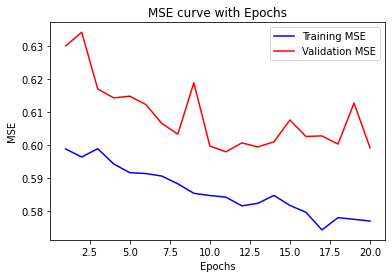

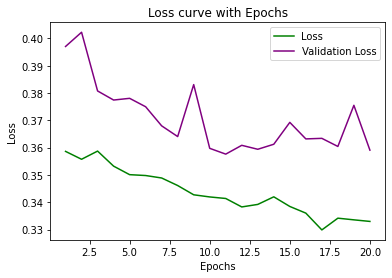

In [33]:
# Plotting and Visualising



modelmse =  a.history["root_mean_squared_error"]

modelvmse = a.history["val_root_mean_squared_error"]

modelloss = a.history["loss"]

modelvalloss = a.history["val_loss"]

epochs_list = range(1,21)



plt.plot(epochs_list, modelmse, 'blue', label='Training MSE')

plt.plot(epochs_list, modelvmse, 'red', label='Validation MSE')

plt.xlabel('Epochs')

plt.ylabel('MSE')

plt.title('MSE curve with Epochs')

plt.legend()

plt.show()



#Loss Plot

plt.plot(epochs_list, modelloss, 'green', label="Loss")

plt.plot(epochs_list, modelvalloss, 'purple', label="Validation Loss")

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss curve with Epochs')

plt.legend()

plt.show()

# The validation rmse(accuracy) of model1 is 0.731 and loss(mse) in 0.53.
# The validation rmse(accuracy) of model2 is 0.599 and loss(mse) is 0.35.

# Thus the model 2 works better on california_housing dataset.

